In [0]:
#import statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
#using pandas to retrieve data in a dataframe
data = pd.read_csv("http://iali.in/datasets/Social_Network_Ads.csv") 

#converting gender data to binary values
dict = {'Male':0, 'Female':1}
data['Gender'] = data['Gender'].map(dict)

#assigning x & y 
y = data['Purchased']
x = data.drop(['Purchased', 'User ID'],axis=1)
x = (x - np.min(x))/(np.max(x)).values

#choosing training and testing sets from dataframe
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
#using logistic regression model and initializing it
logistic_reg = linear_model.LogisticRegression(solver='liblinear', C=15.0, random_state=42)

#fitting the model 
logistic_reg.fit(x_train, y_train)

#checking training & testing scores
print(logistic_reg.score(x_train, y_train))
print(logistic_reg.score(x_test, y_test))





0.821875
0.8875


              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



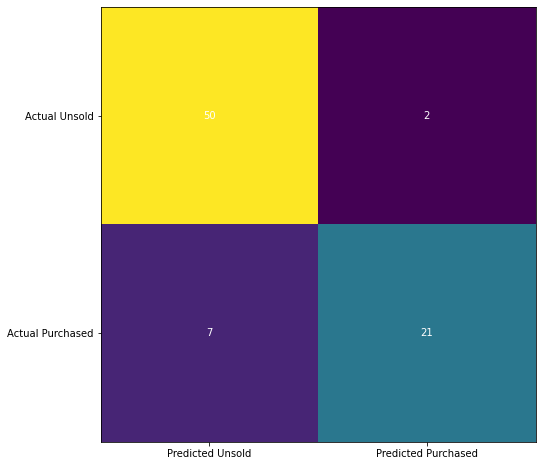

In [47]:
#testing the model
y_predict = logistic_reg.predict(x_test)
print(classification_report(y_test, y_predict))

#plotting the results
cm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Unsold', 'Predicted Purchased'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Unsold', 'Actual Purchased'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()